<a href="https://colab.research.google.com/github/chetan0220/ML-Sem6/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

[Dataset](https://archive.ics.uci.edu/dataset/236/seeds)

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split

## Data Description

In [ ]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("/content/drive/MyDrive/ML/k_means_clustering/seeds_dataset.txt", names=cols, sep="\s+")

In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


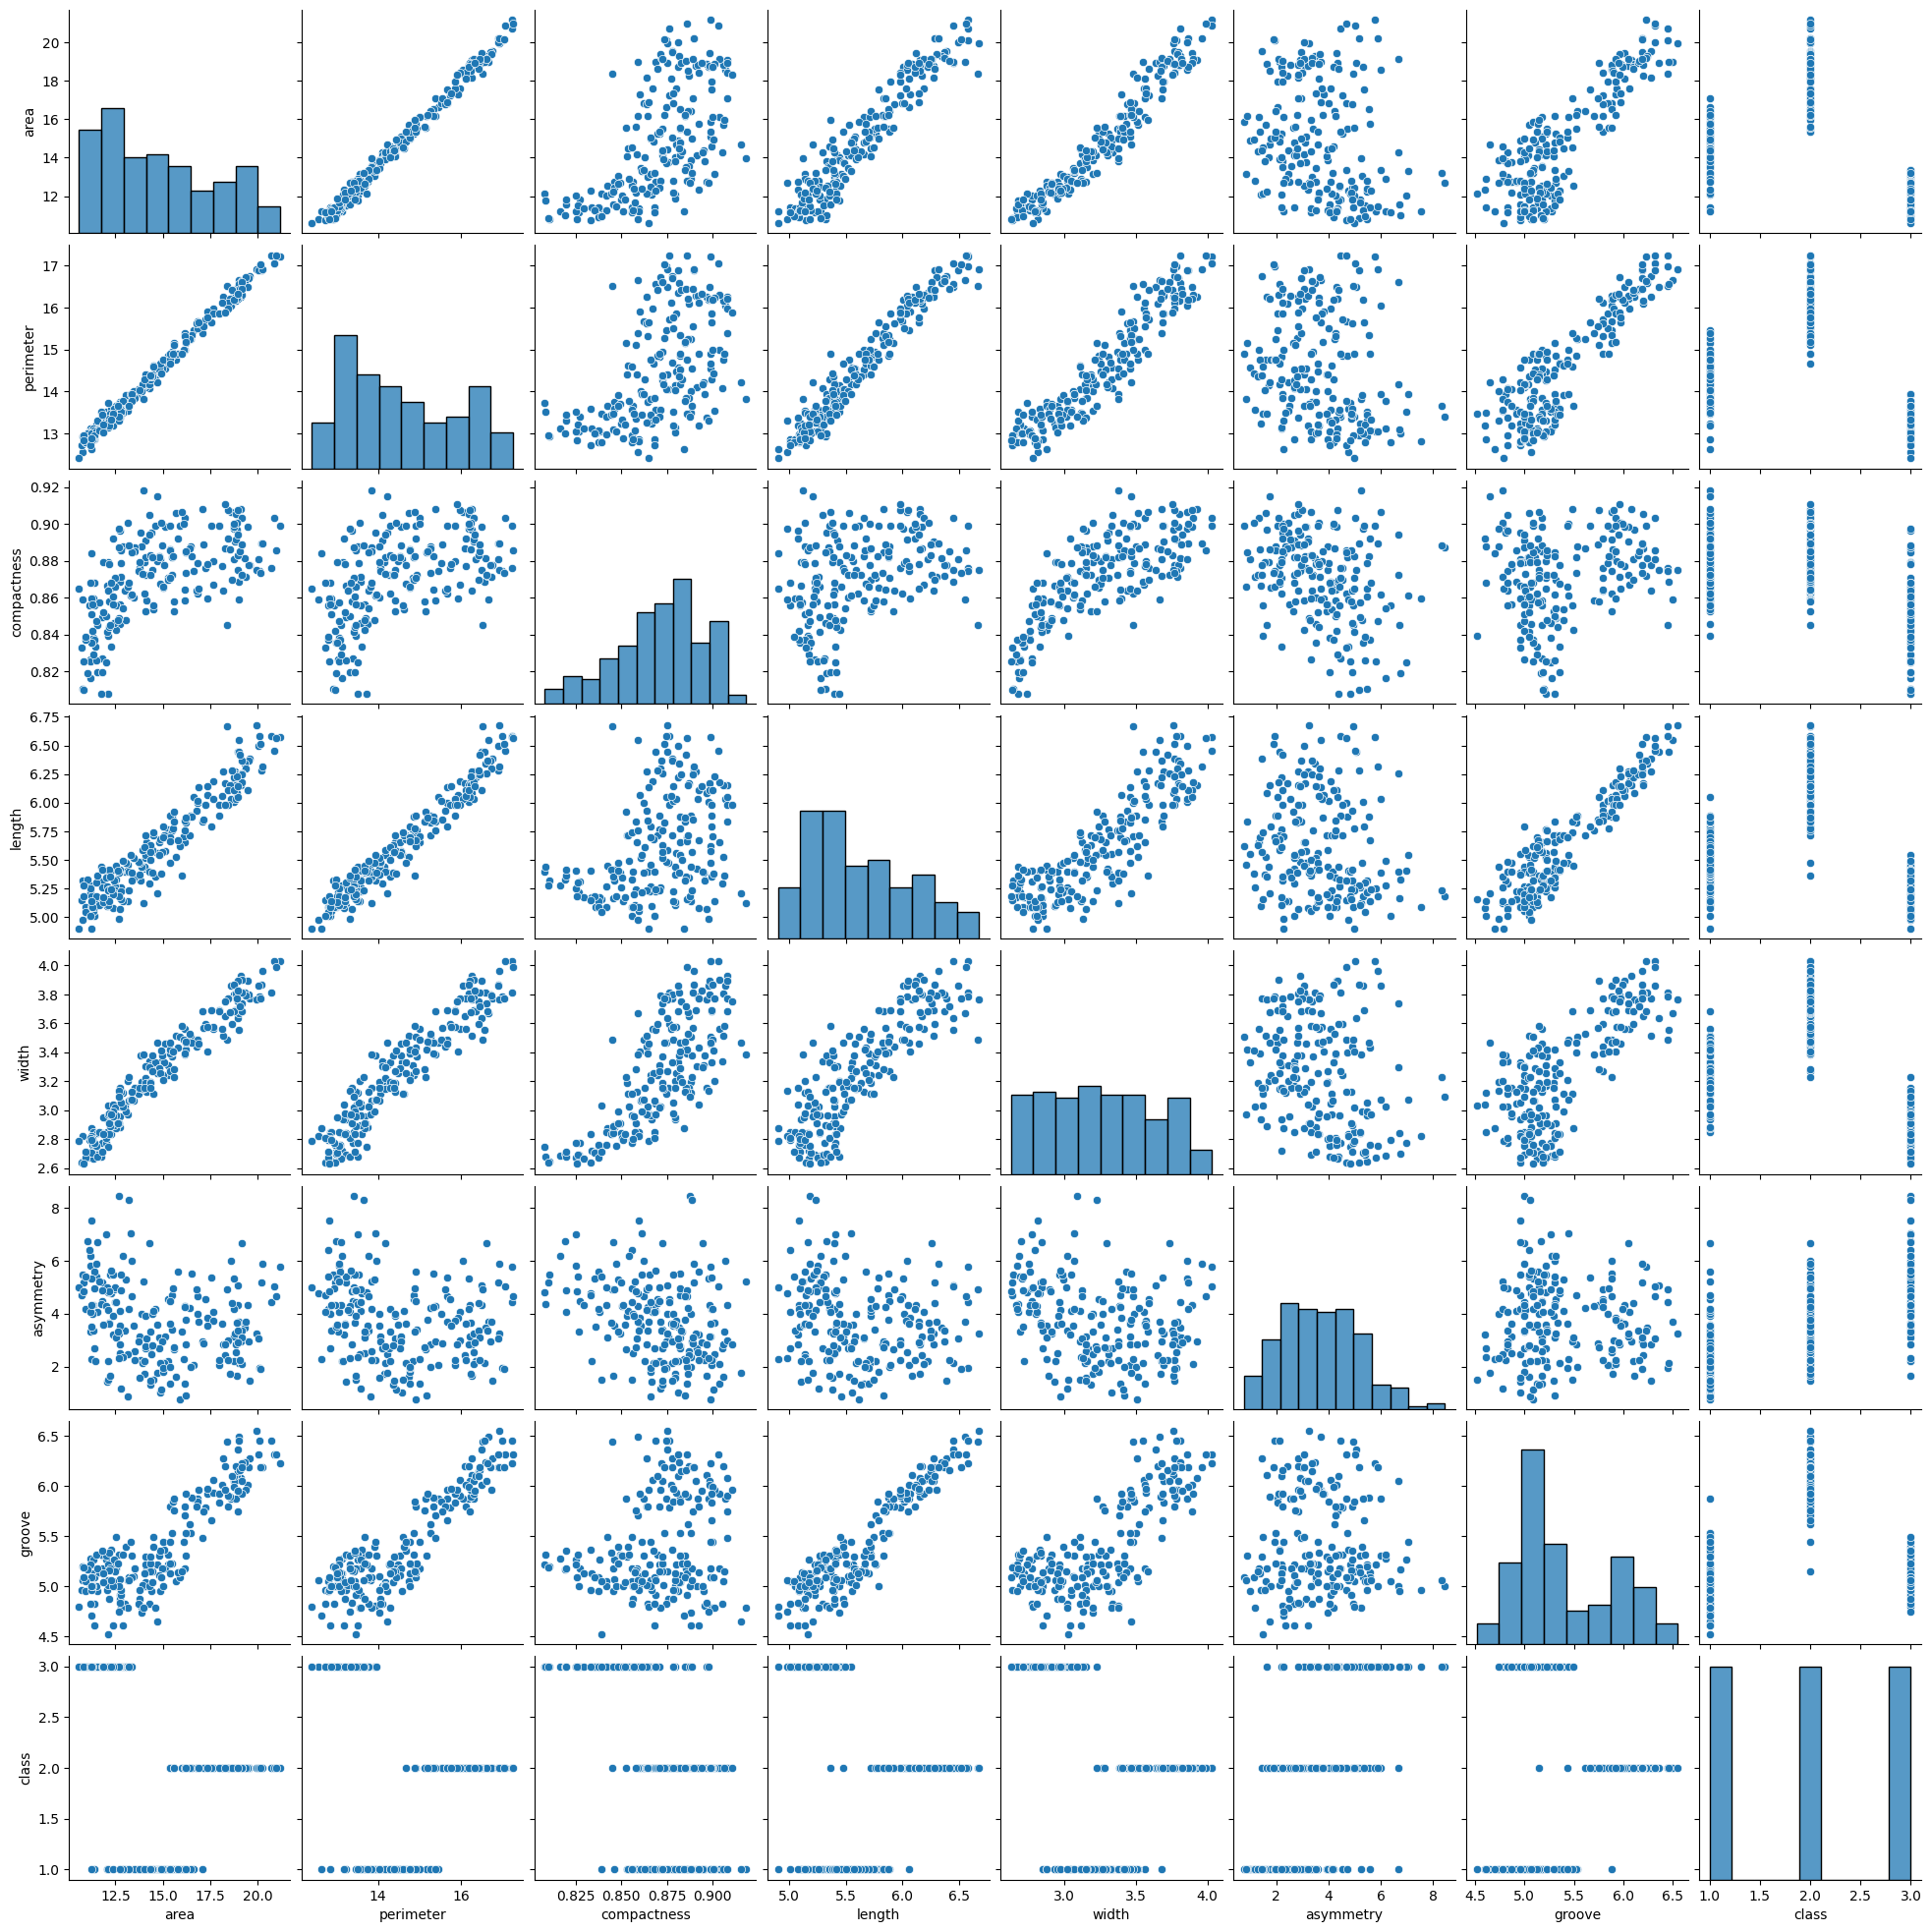

In [ ]:
sns.pairplot(df)

In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Seperating Dependent - Independent variables

In [ ]:
X = df.drop(['class'], axis = True)
y = df['class']

## Scaling

In [ ]:
std_scaler = StandardScaler()

In [ ]:
features_to_scale = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry','groove']
for feature in features_to_scale:
    X[feature] = std_scaler.fit_transform(X[feature].values.reshape(-1, 1))

In [ ]:
X

,area,perimeter,compactness,length,width,asymmetry,groove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: class, Length: 210, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 28)

## K Means Clustering

In [ ]:
kmeans = KMeans()

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='distortion')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

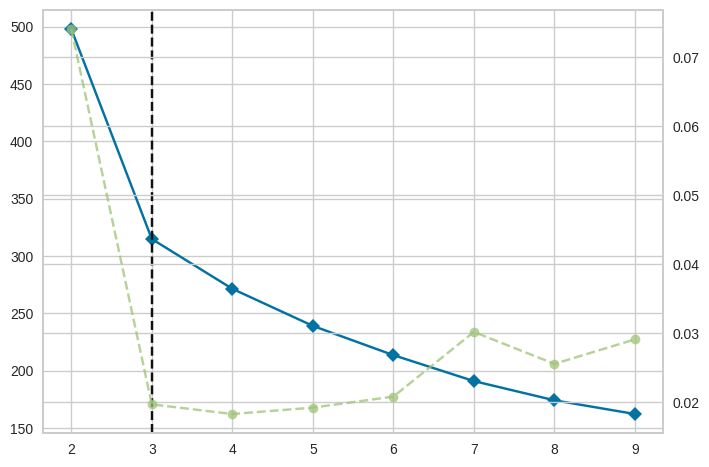

In [ ]:
visualizer.fit(X_train)

In [ ]:
best_kmeans = KMeans(n_clusters = 3)

In [ ]:
best_kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
labels = best_kmeans.predict(X_test)
labels

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 1,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 1, 2], dtype=int32)

In [ ]:
silhouette_avg = silhouette_score(X_test, labels)
silhouette_avg

0.3621677458342919

# K Means on 2D data

In [ ]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv("/content/drive/MyDrive/ML/k_means_clustering/seeds_dataset.txt", names=cols, sep="\s+")

In [ ]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
X = df[['compactness', 'groove']]
y = df['class']

In [ ]:
X

,compactness,groove
0,0.8710,5.220
1,0.8811,4.956
2,0.9050,4.825
3,0.8955,4.805
4,0.9034,5.175
...,...,...
205,0.8783,4.870
206,0.8511,5.003
207,0.8883,5.056
208,0.8521,5.044


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: class, Length: 210, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [ ]:
len(X_test)

42

In [ ]:
kmeans = KMeans()

In [ ]:
viz = KElbowVisualizer(kmeans, metric='distortion', k=(2, 10))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

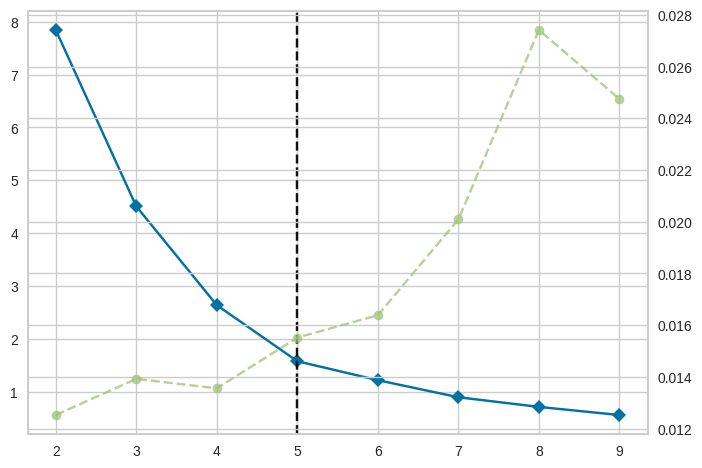

In [ ]:
viz.fit(X_train)

In [ ]:
best_kmeans = KMeans(n_clusters = 5)

In [ ]:
best_kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
assigned_clusters = best_kmeans.predict(X_test)
assigned_clusters

array([4, 0, 3, 0, 0, 0, 0, 2, 4, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 4, 3, 2,
       0, 1, 0, 1, 3, 1, 3, 0, 3, 2, 2, 2, 2, 1, 3, 3, 3, 3, 2, 0],
      dtype=int32)

In [ ]:
silhouette_score(X_test, assigned_clusters)

0.4707304318042273

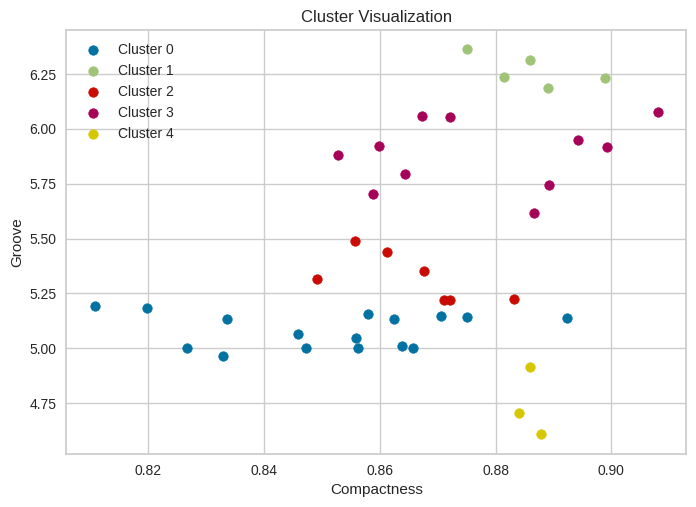

In [ ]:
# Scatter plot each cluster
for label in set(assigned_clusters):
    plt.scatter(X_test[assigned_clusters == label]['compactness'], X_test[assigned_clusters == label]['groove'], label=f'Cluster {label}')

plt.xlabel('Compactness')
plt.ylabel('Groove')
plt.title('Cluster Visualization')
plt.legend()
plt.show()